In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
rectifier = pd.read_csv("data/parser/rectifier.csv")
print(rectifier.shape)
rectifier.head()

(20, 17)


,整流器,項目,檢測日期,排流點電位_mv,自動回授電位_mv,接地棒阻抗_Ω,鈦陽極接地電阻A1_Ω,鈦陽極接地電阻A2_Ω,鈦陽極接地電阻A3_Ω,鈦陽極接地電阻A4_Ω,鈦陽極總接地電阻_Ω,本次電力_KWH,平均電力值_KWH/日,交流輸入_A,交流輸入_V,直流輸出_A,直流輸出_V
0,24,109Q3,2020-07-21 00:00:00,-1447,-1348,6.32,4.56,4.52,4.65,5.91,4.28,3541,6.750000,0.65,230.9,1.55,3.80
1,24,109Q4,2020-12-01 00:00:00,-1371,-1298,6.86,5.72,5.73,5.85,6.81,5.48,4303,5.730000,1.74,231.6,1.81,1.87
2,24,110Q1,2021-01-22 00:00:00,-1492,-1318,3.20,2.28,2.33,2.35,3.64,2.22,4655,6.770000,0.68,231.0,1.56,3.77
3,24,110Q2,2021-04-29 00:00:00,-1217,-1182,6.82,5.43,5.65,6.73,7.44,5.36,5288,6.530000,0.84,235.0,2.10,3.76
4,24,110Q3,2021-07-20 00:00:00,-1457,-1198,1.10,1.79,2.61,2.84,3.19,2.19,5750,5.634146,0.74,230.2,1.75,3.77


In [3]:
corrosion = pd.read_csv("data/parser/corrosion.csv")
print(corrosion.shape)
corrosion.head()

(40, 8)


,季節,檢測器,G95汽油管線,DS柴油管線,JF航空燃油管線,G92汽油管線,最低電位標準值,最高電位標準值
0,1,T168,-1319,-1318,-1312,-1311,-1500,-850
1,1,T167,-1408,-1405,-1400,-1402,-1500,-850
2,1,T166,-1447,-1441,-1419,-1442,-1500,-850
3,1,T165,-1451,-1469,-1427,-1460,-1500,-850
4,1,T164,-1411,-1398,-1442,-1440,-1500,-850


In [4]:
df = pd.read_csv("data/parser/rectifier_corrosion.csv")
print(df.shape)
df.head()

(80, 25)


,整流器,項目,檢測日期,排流點電位_mv,自動回授電位_mv,接地棒阻抗_Ω,鈦陽極接地電阻A1_Ω,鈦陽極接地電阻A2_Ω,鈦陽極接地電阻A3_Ω,鈦陽極接地電阻A4_Ω,...,直流輸出_A,直流輸出_V,季節,檢測器,G95汽油管線,DS柴油管線,JF航空燃油管線,G92汽油管線,最低電位標準值,最高電位標準值
0,24,111Q1,2022-03-17 00:00:00,-1473,-1287,2.56,2.27,2.23,2.26,3.45,...,1.48,3.731,1,168,-1319,-1318,-1312,-1311,-1500,-850
1,24,111Q1,2022-03-17 00:00:00,-1473,-1287,2.56,2.27,2.23,2.26,3.45,...,1.48,3.731,1,167,-1408,-1405,-1400,-1402,-1500,-850
2,24,111Q1,2022-03-17 00:00:00,-1473,-1287,2.56,2.27,2.23,2.26,3.45,...,1.48,3.731,1,166,-1447,-1441,-1419,-1442,-1500,-850
3,24,111Q1,2022-03-17 00:00:00,-1473,-1287,2.56,2.27,2.23,2.26,3.45,...,1.48,3.731,1,165,-1451,-1469,-1427,-1460,-1500,-850
4,24,111Q1,2022-03-17 00:00:00,-1473,-1287,2.56,2.27,2.23,2.26,3.45,...,1.48,3.731,1,164,-1411,-1398,-1442,-1440,-1500,-850


## Heatmap

C:\Users\tzuli\AppData\Local\Temp\ipykernel_17776\40636611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = rectifier.corr().round(4)


<AxesSubplot: >

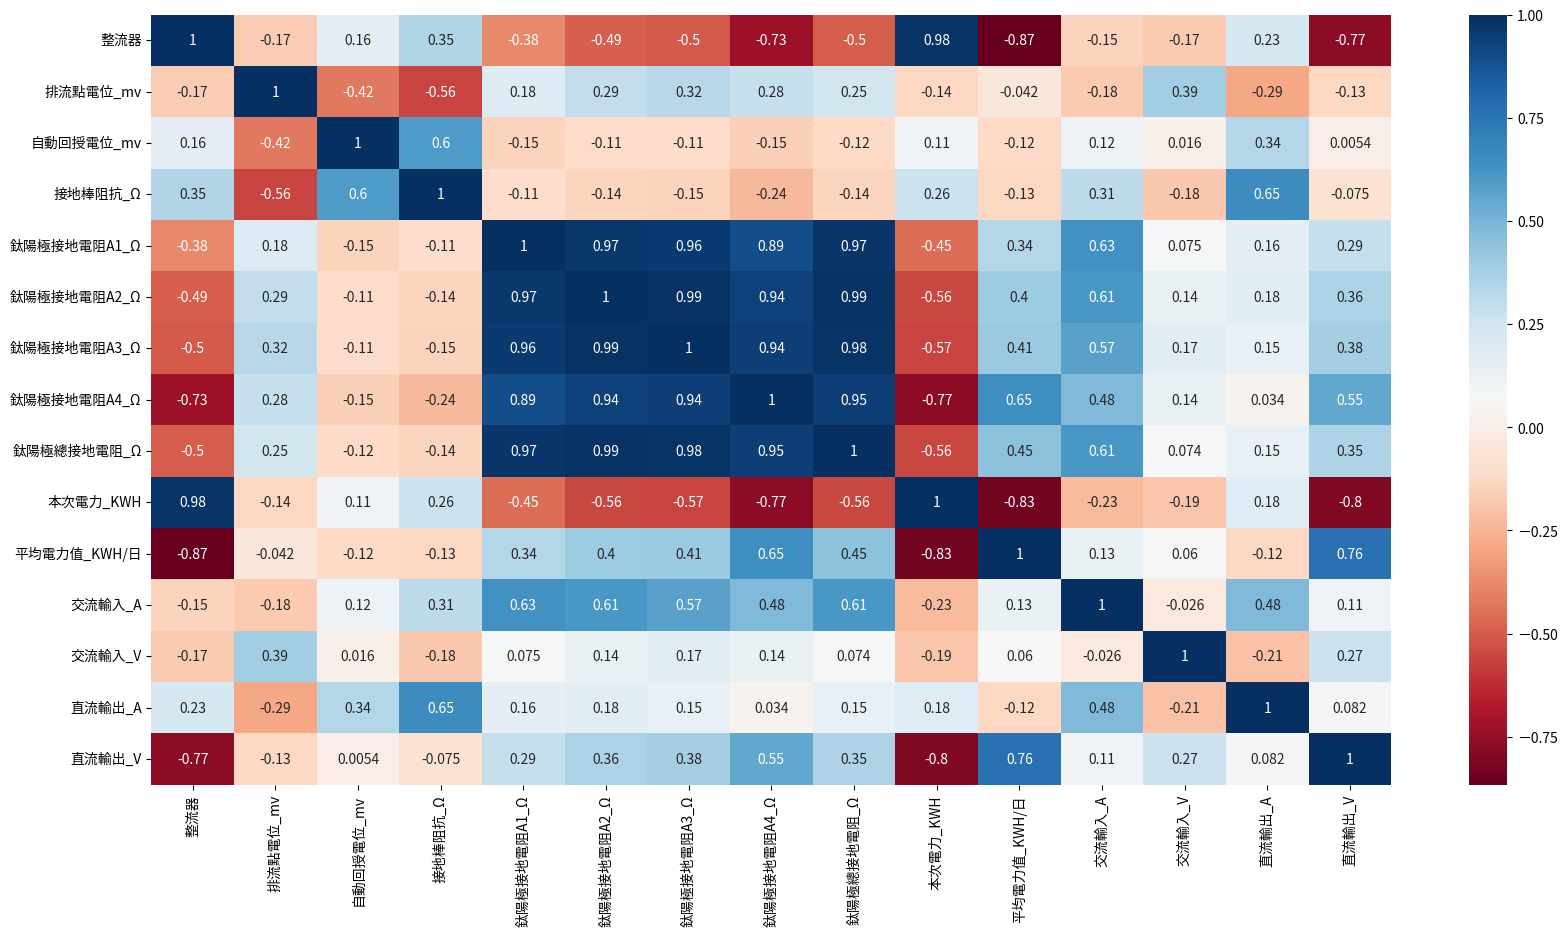

In [5]:
plt.figure(figsize=(20, 10))
corr = rectifier.corr().round(4)
sns.heatmap(data = corr, annot=True, cmap = 'RdBu')

plt.figure(figsize=(15, 5))
corr = corrosion.corr().round(4)
sns.heatmap(data = corr, annot=True, cmap = 'RdBu')

plt.figure(figsize=(20, 10))
corr = df.select_dtypes("number").corr().round(4)
sns.heatmap(data = corr, annot=True, cmap = 'RdBu')
plt.show()

## Univariate Analysis 

In [6]:
# rectifier["季節"] = rectifier["項目"].str[-1]
# rectifier["季節"] = rectifier["季節"].astype(int)

# corrosion["檢測器1"] = corrosion["檢測器"].str[1:]
# corrosion["檢測器1"] = corrosion["檢測器1"].astype(int)

num_feat1 = [
    '排流點電位_mv', '自動回授電位_mv', '接地棒阻抗_Ω', '鈦陽極接地電阻A1_Ω', '鈦陽極接地電阻A2_Ω', '鈦陽極接地電阻A3_Ω', '鈦陽極接地電阻A4_Ω', '鈦陽極總接地電阻_Ω', 
    '本次電力_KWH', '平均電力值_KWH/日', '交流輸入_A', '交流輸入_V', '直流輸出_A', '直流輸出_V'
    ]
cat_feat1 = ["整流器", "季節"]

num_feat2 = ['G95汽油管線', 'DS柴油管線', 'JF航空燃油管線', 'G92汽油管線']
cat_feat2 = ["季節", '檢測器1']

num_feat = [
    '排流點電位_mv', '自動回授電位_mv', '接地棒阻抗_Ω', '鈦陽極接地電阻A1_Ω', '鈦陽極接地電阻A2_Ω', '鈦陽極接地電阻A3_Ω', '鈦陽極接地電阻A4_Ω', '鈦陽極總接地電阻_Ω', 
    '本次電力_KWH', '平均電力值_KWH/日', '交流輸入_A', '交流輸入_V', '直流輸出_A', '直流輸出_V', 'G95汽油管線', 'DS柴油管線', 'JF航空燃油管線', 'G92汽油管線'
    ]
cat_feat = ["整流器", '檢測器', "季節"]

a = 2 ; b = 7 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        rectifier[num_feat1[k]].plot(kind = "box", ax = ax[i, j])
        k += 1

a = 1 ; b = 2 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (10, 4))
for i in range(a):
    for j in range(b):
        sns.countplot(data = rectifier, x = cat_feat1[k], ax = ax[j])
        k += 1

a = 1 ; b = 4 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (20, 4))
for i in range(a):
    for j in range(b):
        corrosion[num_feat2[k]].plot(kind = "box", ax = ax[j])
        k += 1

a = 1 ; b = 2 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (15, 4))
for i in range(a):
    for j in range(b):
        sns.countplot(data = corrosion, x = cat_feat2[k], ax = ax[j])
        k += 1

a = 3 ; b = 6 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        df[num_feat[k]].plot(kind = "box", ax = ax[i, j])
        k += 1

a = 1 ; b = 3 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (15, 4))
for i in range(a):
    for j in range(b):
        sns.countplot(data = df, x = cat_feat[k], ax = ax[j])
        k += 1

## Multivariate analysis

a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat1[k], x = "整流器", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat1[k], x = "季節", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

a = 1 ; b = 4 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 4))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat2[k], x = "季節", data = corrosion, ax = ax[j])
        k += 1

a = 2 ; b = 2 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 8))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat2[k], x = "檢測器1", data = corrosion, ax = ax[i, j])
        k += 1

a = 3 ; b = 6 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat[k], x = "整流器", data = df, ax = ax[i, j])
        k += 1

        if k == len(num_feat):
            break

a = 4 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 15))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat[k], x = "檢測器", data = df, ax = ax[i, j])
        k += 1

        if k == len(num_feat):
            break

a = 3 ; b = 6 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat[k], x = "季節", data = df, ax = ax[i, j])
        k += 1

        if k == len(num_feat):
            break

## Correlation between variables and Y

a = 3 ; b = 4 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat1[k], y = "排流點電位_mv", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

a = 3 ; b = 4 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat1[k], y = "自動回授電位_mv", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

a = 3 ; b = 6 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat[k], y = "排流點電位_mv", data = df, ax = ax[i, j])
        k += 1

        if k == len(num_feat):
            break

a = 3 ; b = 6 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat[k], y = "自動回授電位_mv", data = df, ax = ax[i, j])
        k += 1

        if k == len(num_feat):
            break

## Correlation between variables

sns.pairplot(rectifier[num_feat1], corner=True)

sns.pairplot(df[num_feat], corner=True)

## Grouping

In [7]:
rectifier1 = rectifier.copy()

rectifier1_24 = rectifier1.iloc[:10, 3:]
rectifier1_25 = rectifier1.iloc[10:, 3:]

### HDBSCAN

In [8]:
import hdbscan

hdbscan0 = hdbscan.HDBSCAN(min_cluster_size = 2).fit(rectifier1.iloc[:, 3:])
hdbscan1 = hdbscan.HDBSCAN(min_cluster_size = 2).fit(rectifier1_24)
hdbscan2 = hdbscan.HDBSCAN(min_cluster_size = 2).fit(rectifier1_25)
print(hdbscan0.labels_, "\n")
print(hdbscan1.labels_, hdbscan2.labels_)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0] 

[0 0 0 0 0 0 1 1 1 1] [-1 -1  0  0  1  1  2  2  2 -1]


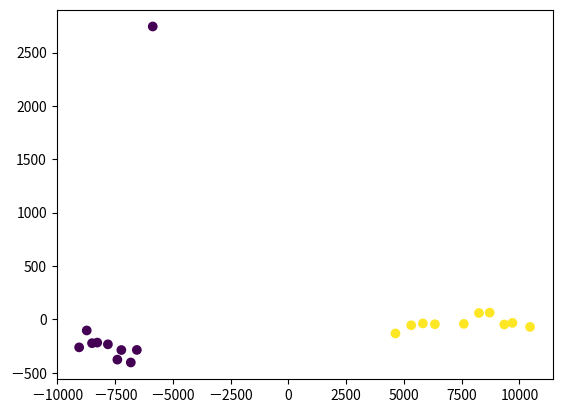

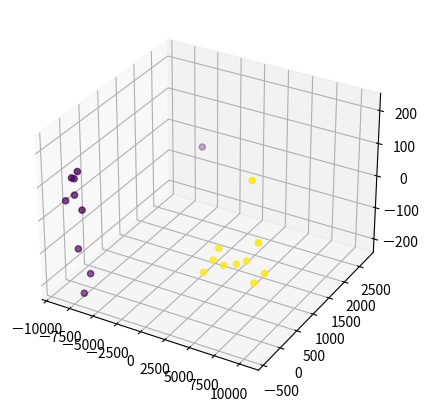

In [9]:
pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier1.iloc[:, 3:])
plt.scatter(X[:, 0], X[:, 1], c = hdbscan0.labels_)

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier1.iloc[:, 3:])
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = hdbscan0.labels_)

In [10]:
rectifier1.loc[:9, "hdbscan"] = hdbscan1.labels_
rectifier1.loc[10:, "hdbscan"] = hdbscan2.labels_

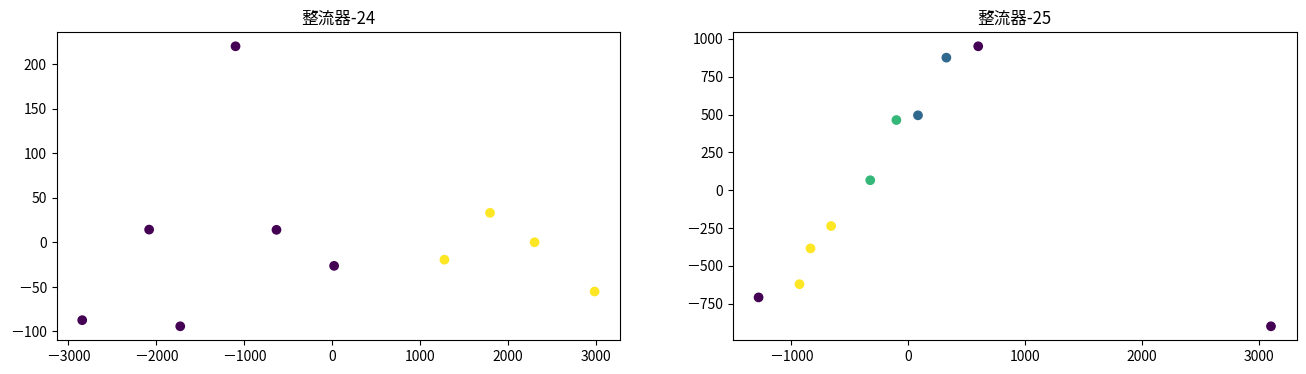

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier1_24)
ax[0].scatter(X[:, 0], X[:, 1], c = hdbscan1.labels_)
ax[0].set_title("整流器-24")

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier1_25)
ax[1].scatter(X[:, 0], X[:, 1], c = hdbscan2.labels_)
ax[1].set_title("整流器-25")

plt.show()

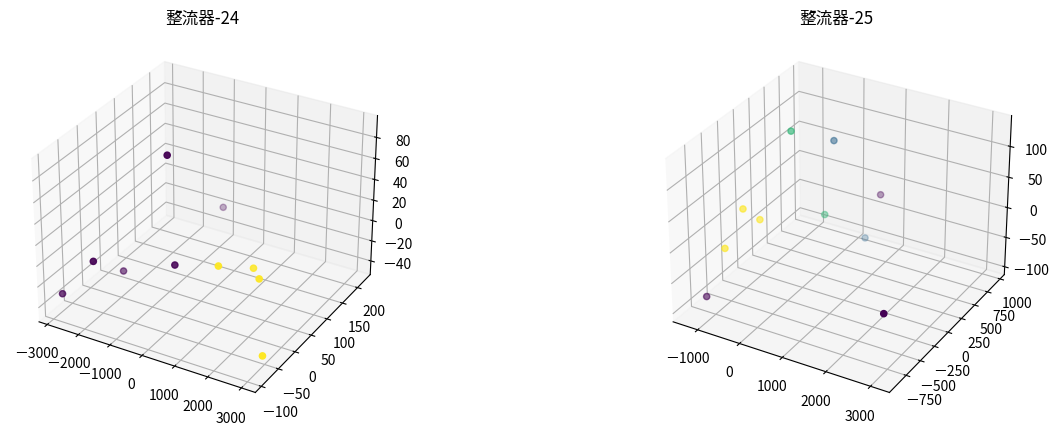

In [12]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier1_24)
ax[0].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = hdbscan1.labels_)
ax[0].set_title("整流器-24")


pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier1_25)
ax[1].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = hdbscan2.labels_)
ax[1].set_title("整流器-25")

plt.show()

### KMeans

In [13]:
from sklearn.cluster import KMeans

kmeans0 = KMeans(n_clusters = 2).fit(rectifier1.iloc[:, 3:])
kmeans1 = KMeans(n_clusters = 3).fit(rectifier1_24)
kmeans2 = KMeans(n_clusters = 3).fit(rectifier1_25)
print(kmeans0.labels_, "\n")
print(kmeans1.labels_, kmeans2.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1] 

[2 2 2 0 0 0 1 1 1 1] [2 0 0 0 0 1 1 1 1 1]


c:\Users\tzuli\Documents\python\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tzuli\Documents\python\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tzuli\Documents\python\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


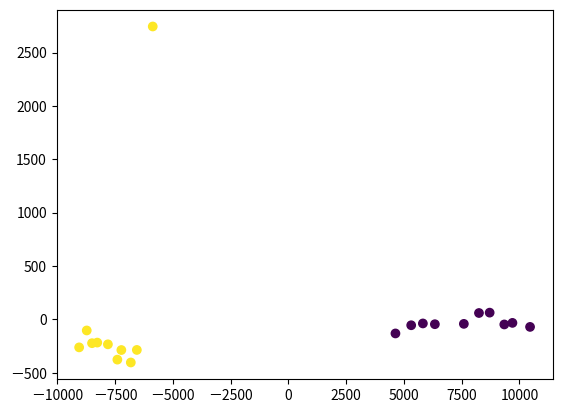

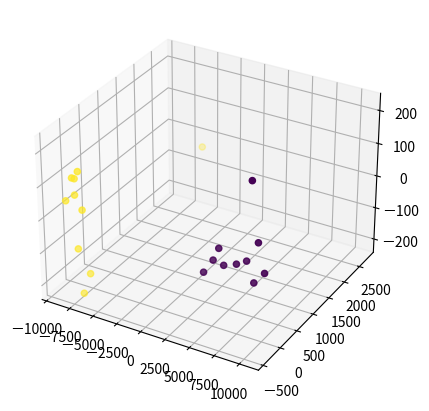

In [14]:
pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier1.iloc[:, 3:])
plt.scatter(X[:, 0], X[:, 1], c = kmeans0.labels_)

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier1.iloc[:, 3:])
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = kmeans0.labels_)

In [15]:
rectifier1.loc[:9, "kmeans"] = kmeans1.labels_
rectifier1.loc[10:, "kmeans"] = kmeans2.labels_

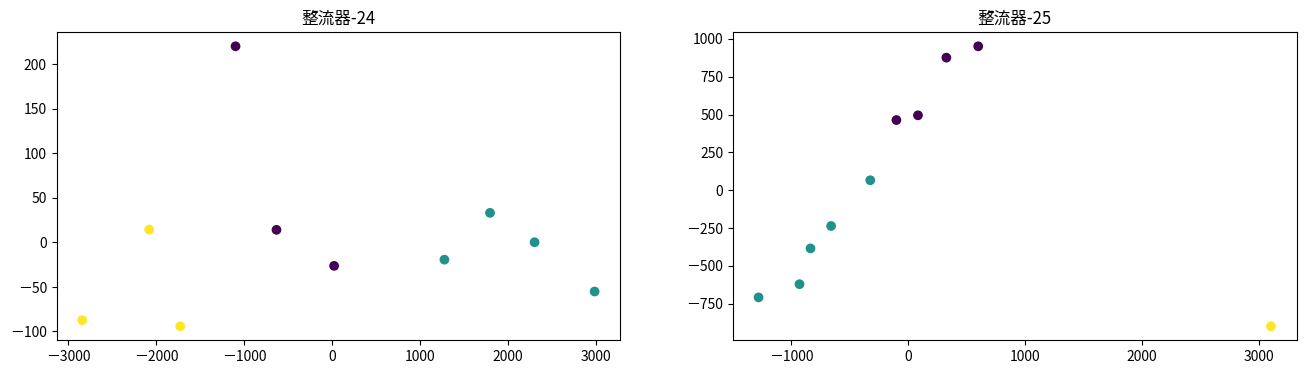

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier1_24)
ax[0].scatter(X[:, 0], X[:, 1], c = kmeans1.labels_)
ax[0].set_title("整流器-24")

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier1_25)
ax[1].scatter(X[:, 0], X[:, 1], c = kmeans2.labels_)
ax[1].set_title("整流器-25")

plt.show()

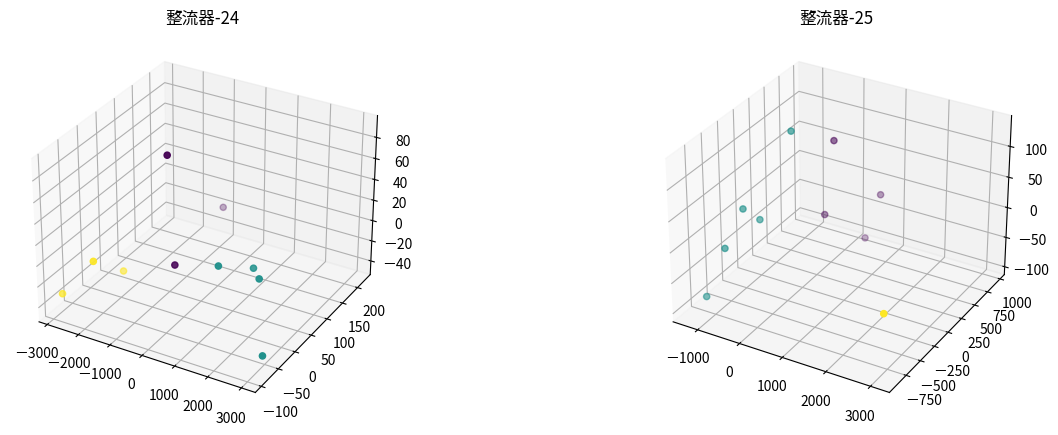

In [17]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier1_24)
ax[0].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = kmeans1.labels_)
ax[0].set_title("整流器-24")


pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier1_25)
ax[1].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = kmeans2.labels_)
ax[1].set_title("整流器-25")

plt.show()

## Grouping Analysis

In [18]:
rectifier1["hdbscan"] = rectifier1["hdbscan"].astype(int)
rectifier1["kmeans"] = rectifier1["kmeans"].astype(int)

rectifier1_24 = rectifier1.loc[:9]
rectifier1_25 = rectifier1.loc[10:]

In [19]:
rectifier1_24

,整流器,項目,檢測日期,排流點電位_mv,自動回授電位_mv,接地棒阻抗_Ω,鈦陽極接地電阻A1_Ω,鈦陽極接地電阻A2_Ω,鈦陽極接地電阻A3_Ω,鈦陽極接地電阻A4_Ω,鈦陽極總接地電阻_Ω,本次電力_KWH,平均電力值_KWH/日,交流輸入_A,交流輸入_V,直流輸出_A,直流輸出_V,hdbscan,kmeans
0,24,109Q3,2020-07-21 00:00:00,-1447,-1348,6.32,4.56,4.52,4.65,5.91,4.28,3541,6.750000,0.65,230.9,1.55,3.800,0,2
1,24,109Q4,2020-12-01 00:00:00,-1371,-1298,6.86,5.72,5.73,5.85,6.81,5.48,4303,5.730000,1.74,231.6,1.81,1.870,0,2
2,24,110Q1,2021-01-22 00:00:00,-1492,-1318,3.20,2.28,2.33,2.35,3.64,2.22,4655,6.770000,0.68,231.0,1.56,3.770,0,2
3,24,110Q2,2021-04-29 00:00:00,-1217,-1182,6.82,5.43,5.65,6.73,7.44,5.36,5288,6.530000,0.84,235.0,2.10,3.760,0,0
4,24,110Q3,2021-07-20 00:00:00,-1457,-1198,1.10,1.79,2.61,2.84,3.19,2.19,5750,5.634146,0.74,230.2,1.75,3.770,0,0
5,24,110Q4,2021-10-14 00:00:00,-1456,-1294,3.96,2.72,2.70,2.77,4.53,2.68,6405,7.616279,0.76,228.6,1.89,3.892,0,0
6,24,111Q1,2022-03-17 00:00:00,-1473,-1287,2.56,2.27,2.23,2.26,3.45,2.03,7659,8.142857,0.70,233.6,1.48,3.731,1,1
7,24,111Q2,2022-05-27 00:00:00,-1429,-1272,2.52,2.44,2.42,2.41,3.84,2.28,8178,7.309859,0.73,232.0,1.72,3.726,1,1
8,24,111Q3,2022-08-03 00:00:00,-1467,-1287,0.74,3.52,3.58,3.60,5.12,3.43,8684,7.441176,0.71,232.4,1.75,3.741,1,1
9,24,111Q4,2022-11-03 00:00:00,-1498,-1360,0.57,3.48,3.37,3.56,5.20,3.63,9366,7.413043,0.71,224.8,1.78,1.817,1,1


In [20]:
rectifier1_25

,整流器,項目,檢測日期,排流點電位_mv,自動回授電位_mv,接地棒阻抗_Ω,鈦陽極接地電阻A1_Ω,鈦陽極接地電阻A2_Ω,鈦陽極接地電阻A3_Ω,鈦陽極接地電阻A4_Ω,鈦陽極總接地電阻_Ω,本次電力_KWH,平均電力值_KWH/日,交流輸入_A,交流輸入_V,直流輸出_A,直流輸出_V,hdbscan,kmeans
10,25,109Q3,2020-07-20 00:00:00,-1686,1605,53.20,2.08,2.03,2.01,1.99,1.85,19842,4.160000,0.96,230.2,3.92,2.360,-1,2
11,25,109Q4,2020-12-01 00:00:00,-1598,-1421,59.70,2.27,2.01,1.95,1.98,1.87,20557,5.340000,1.07,228.3,4.88,2.300,-1,0
12,25,110Q1,2021-01-20 00:00:00,-1645,-1539,5.98,3.72,2.65,2.93,2.99,2.97,20819,5.240000,0.91,229.5,0.32,2.280,0,0
13,25,110Q2,2021-04-28 00:00:00,-1413,-1402,3.72,5.15,5.23,5.27,5.18,4.94,21228,4.170000,1.15,230.0,4.87,2.390,0,0
14,25,110Q3,2021-07-19 00:00:00,-1518,-1498,5.93,2.66,1.85,1.83,1.90,1.39,21401,2.109756,0.73,229.3,2.69,2.010,1,0
15,25,110Q4,2021-10-14 00:00:00,-1312,-1336,7.65,2.28,2.21,2.27,2.36,2.09,21809,4.689655,0.53,229.6,1.39,0.873,1,1
16,25,111Q1,2022-03-17 00:00:00,-1390,-1321,2.73,1.58,1.47,1.35,1.42,1.12,22270,2.993506,0.41,233.8,0.49,0.860,2,1
17,25,111Q2,2022-05-25 00:00:00,-1340,-1321,2.32,2.02,1.98,1.87,1.92,1.75,22496,3.275362,0.41,228.3,0.61,0.945,2,1
18,25,111Q3,2022-08-03 00:00:00,-1364,-1201,0.45,1.01,0.97,0.95,0.97,0.87,22724,3.257143,0.67,230.6,2.43,1.500,2,1
19,25,111Q4,2022-11-02 00:00:00,-1408,-1360,3.94,0.97,0.96,0.98,0.95,0.83,23054,3.626374,0.59,232.6,1.38,1.443,-1,1


In [21]:
des24_max = rectifier1_24.iloc[:, 3:].groupby("kmeans").max().reset_index()
des24_max.insert(1, "界線", "max")
des24_max.insert(0, "整流器", "24")

des24_min = rectifier1_24.iloc[:, 3:].groupby("kmeans").min().reset_index()
des24_min.insert(1, "界線", "min")
des24_min.insert(0, "整流器", "24")

des25_max = rectifier1_25.iloc[:, 3:].groupby("kmeans").max().reset_index()
des25_max.insert(1, "界線", "max")
des25_max.insert(0, "整流器", "25")

des25_min = rectifier1_25.iloc[:, 3:].groupby("kmeans").min().reset_index()
des25_min.insert(1, "界線", "min")
des25_min.insert(0, "整流器", "25")


des = pd.concat([des24_max, des24_min, des25_max, des25_min]).sort_values(["整流器", "kmeans"]).reset_index(drop = True)
des = des.iloc[:, :-1]
des = des.rename(columns = {"kmeans": "分群"})
des

,整流器,分群,界線,排流點電位_mv,自動回授電位_mv,接地棒阻抗_Ω,鈦陽極接地電阻A1_Ω,鈦陽極接地電阻A2_Ω,鈦陽極接地電阻A3_Ω,鈦陽極接地電阻A4_Ω,鈦陽極總接地電阻_Ω,本次電力_KWH,平均電力值_KWH/日,交流輸入_A,交流輸入_V,直流輸出_A,直流輸出_V
0,24,0,max,-1217,-1182,6.82,5.43,5.65,6.73,7.44,5.36,6405,7.616279,0.84,235.0,2.10,3.892
1,24,0,min,-1457,-1294,1.10,1.79,2.61,2.77,3.19,2.19,5288,5.634146,0.74,228.6,1.75,3.760
2,24,1,max,-1429,-1272,2.56,3.52,3.58,3.60,5.20,3.63,9366,8.142857,0.73,233.6,1.78,3.741
3,24,1,min,-1498,-1360,0.57,2.27,2.23,2.26,3.45,2.03,7659,7.309859,0.70,224.8,1.48,1.817
4,24,2,max,-1371,-1298,6.86,5.72,5.73,5.85,6.81,5.48,4655,6.770000,1.74,231.6,1.81,3.800
5,24,2,min,-1492,-1348,3.20,2.28,2.33,2.35,3.64,2.22,3541,5.730000,0.65,230.9,1.55,1.870
6,25,0,max,-1413,-1402,59.70,5.15,5.23,5.27,5.18,4.94,21401,5.340000,1.15,230.0,4.88,2.390
7,25,0,min,-1645,-1539,3.72,2.27,1.85,1.83,1.90,1.39,20557,2.109756,0.73,228.3,0.32,2.010
8,25,1,max,-1312,-1201,7.65,2.28,2.21,2.27,2.36,2.09,23054,4.689655,0.67,233.8,2.43,1.500
9,25,1,min,-1408,-1360,0.45,0.97,0.96,0.95,0.95,0.83,21809,2.993506,0.41,228.3,0.49,0.860


In [22]:
with pd.ExcelWriter("data/parser/group.xlsx") as writer: 
    des.to_excel(writer, sheet_name = "kmeans上下限", index = False)
    rectifier1.to_excel(writer, sheet_name = "分群結果", index = False)

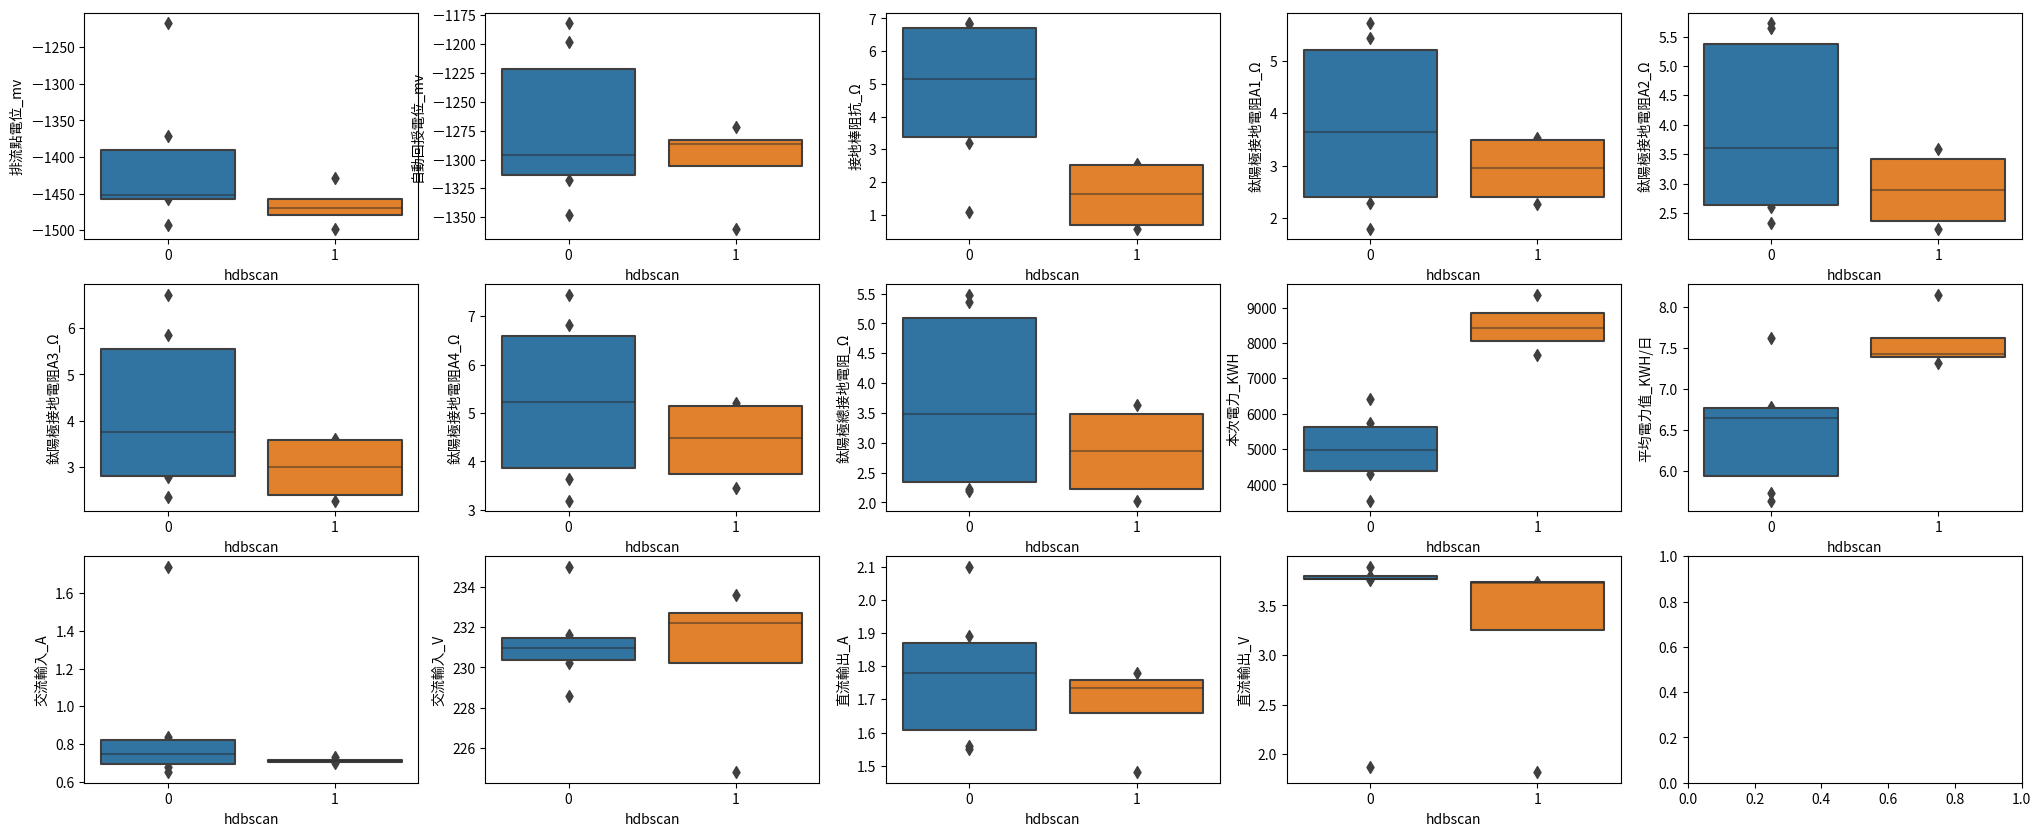

In [23]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat1[k], x = "hdbscan", data = rectifier1_24, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

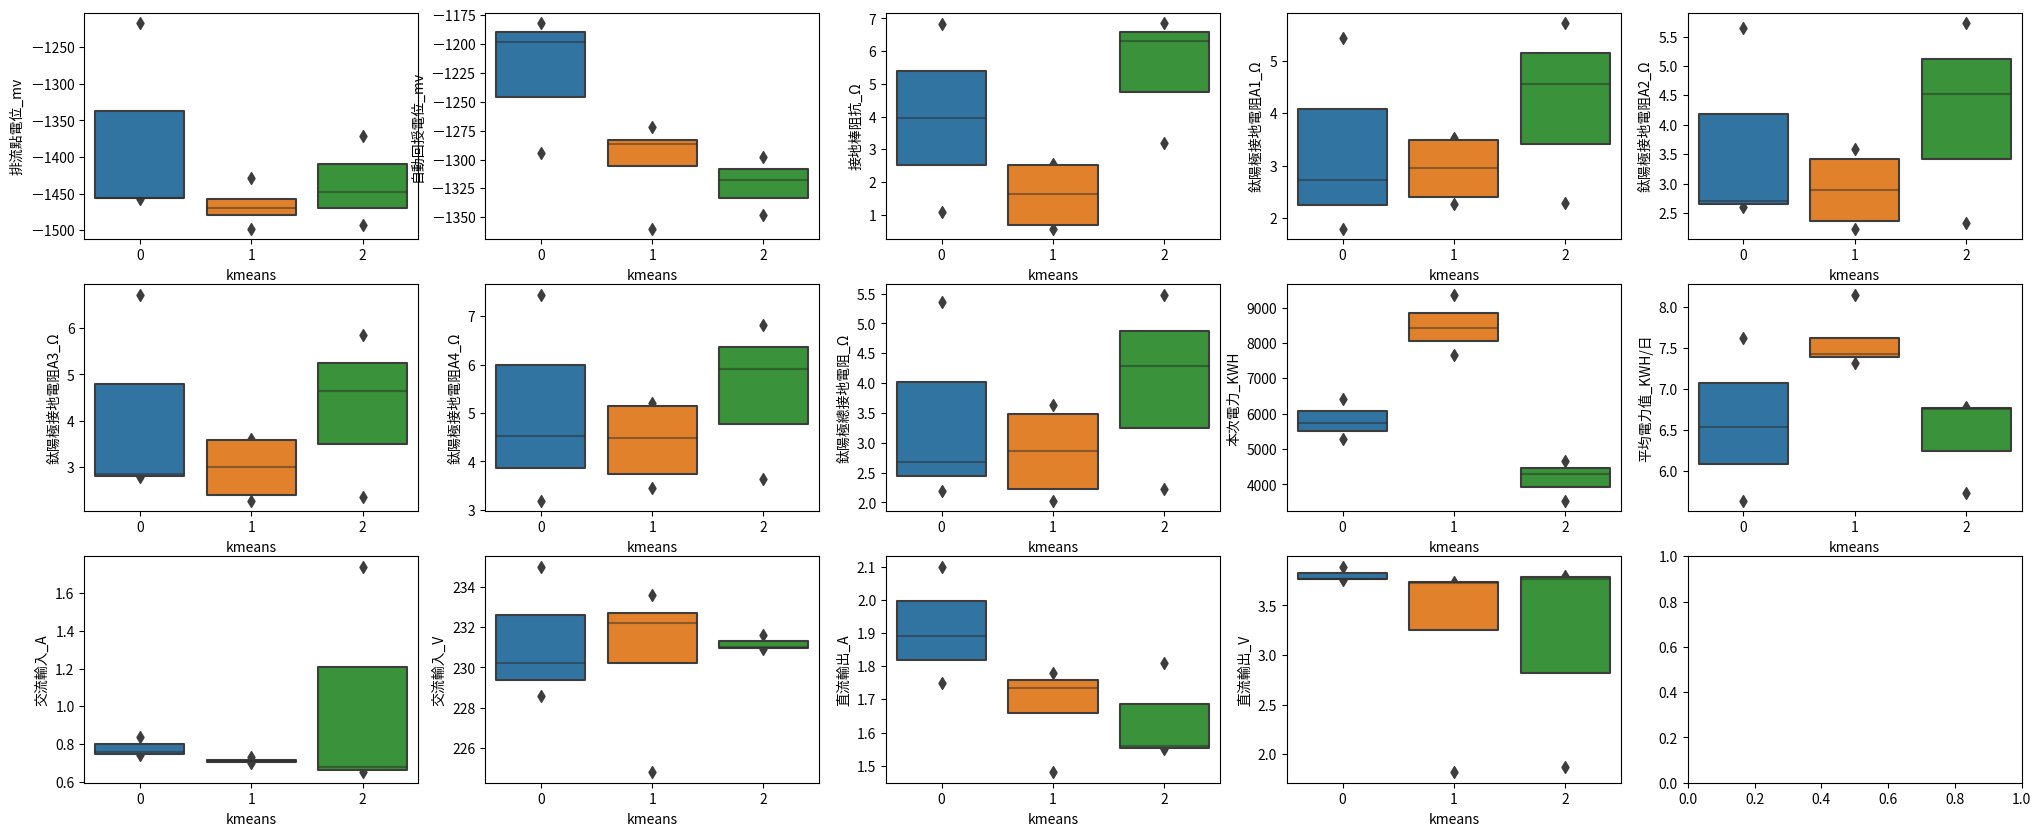

In [24]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat1[k], x = "kmeans", data = rectifier1_24, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

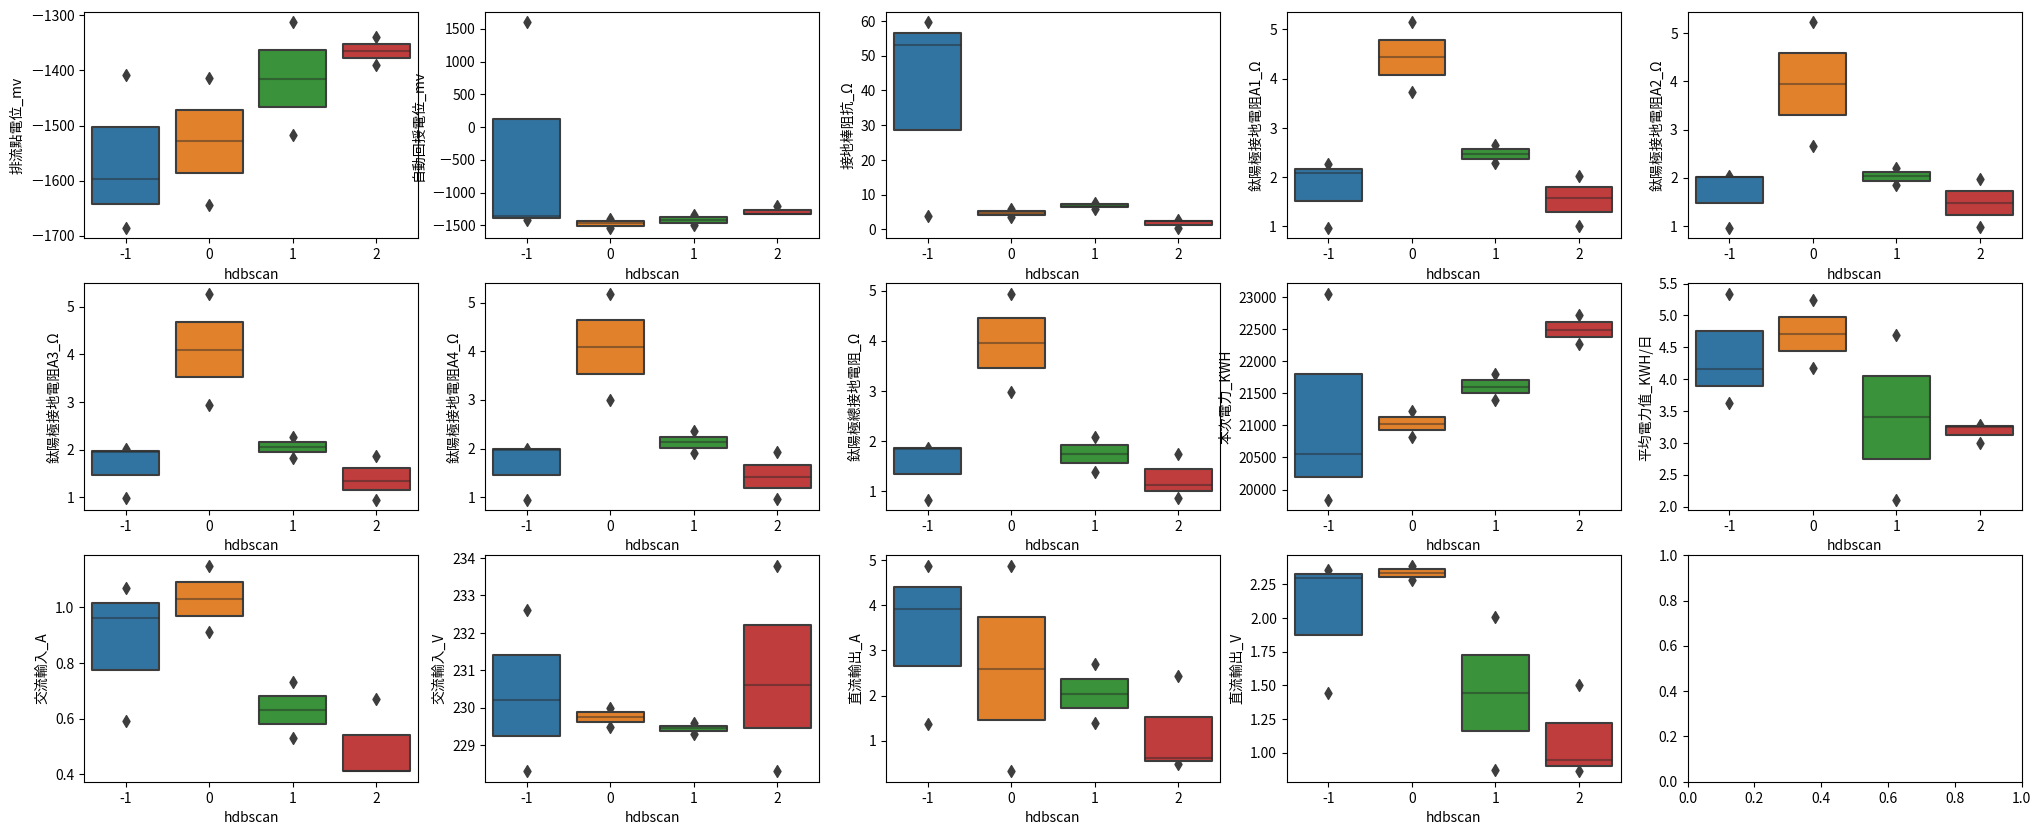

In [25]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat1[k], x = "hdbscan", data = rectifier1_25, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break

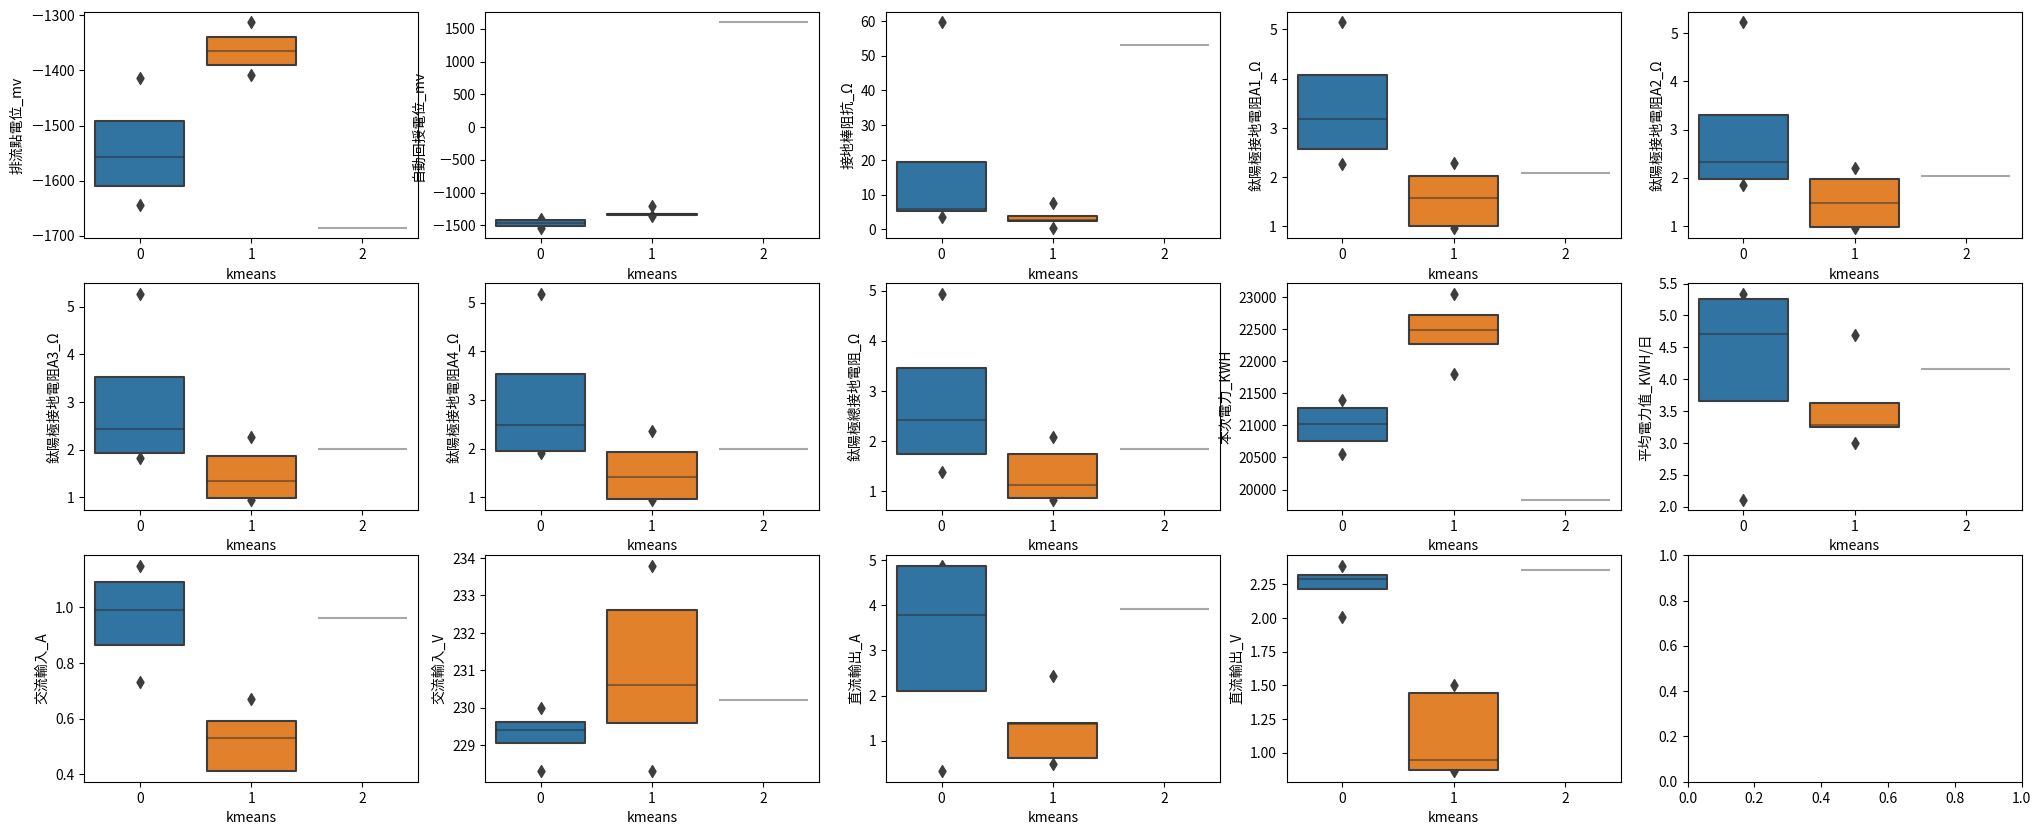

In [26]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat1[k], x = "kmeans", data = rectifier1_25, ax = ax[i, j])
        k += 1

        if k == len(num_feat1):
            break